In [2]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import datetime

In [3]:
plt.rcParams.update({'font.size': 14, "font.family": "Times New Roman"})

In [4]:
t1 = datetime.datetime.fromisoformat("2020-01-22 11:04:35")
t2 = datetime.datetime.fromisoformat("2020-01-24 10:05:35")
t3 = datetime.datetime.fromisoformat("2020-01-24 11:05:35")
(t2 - t1) / (t3 - t1)

0.9791738979521

In [5]:
xticks = [
    datetime.datetime(year=2020, month=1, day=d)
    for d in [9, 21, 25, 29]
] + [
    datetime.datetime(year=2020, month=2, day=1)
]

xticks_str = [
    d.strftime("%Y-%m-%d")
    for d in xticks
]

In [14]:
def read_log(path):
    with open(path, "r") as f:
        lines = f.readlines()

    runtimes = {
        "time": [],
        "runtime": [],
        "timestep": []
    }

    for i, line in enumerate(lines):
        runtime, time_str = line.split(",")
        runtime = float(runtime)
        time_obj = datetime.datetime.fromisoformat(time_str.strip())

        # for j in range(len(xticks) - 1):
        #     if xticks[j] <= time_obj < xticks[j + 1]:
        #         timestep = j + (time_obj - xticks[j]) / (xticks[j + 1] - xticks[j])
        #         break
        
        runtimes["time"].append(time_obj)
        runtimes["runtime"].append(runtime)
        # runtimes["timestep"].append(timestep)

    return runtimes

In [12]:
log_files = []
labels = dict()
colors = dict()
markers = dict()

for y in [2020, 2021]:
    for m in [1, 7]:
        log_files.extend([
            # "../logs/ours/covid-19-in-the-american-continent/covid_american_streaming_k10_false_2020-1_final.txt",
            # "../logs/ours/covid-19-in-the-american-continent/covid_american_streaming_k10_true_2020-1_final.txt",
            f"../logs/ours/covid_american_streaming_k10_true_{y}-{m}.txt",
            f"../logs/ours/covid_american_streaming_k10_false_{y}-{m}.txt",
            f"../logs/related_works/enclosing1998/covid_american_streaming_k10_{y}-{m}.txt",
            f"../logs/related_works/smallest2019/covid_american_streaming_k10_{y}-{m}.txt",
        ])

        labels.update({
            # "../logs/ours/covid-19-in-the-american-continent/covid_american_streaming_k10_false_2020-1_final.txt": "ours (w/o caching)",
            # "../logs/ours/covid-19-in-the-american-continent/covid_american_streaming_k10_true_2020-1_final.txt": "ours (w caching)",
            f"../logs/ours/covid_american_streaming_k10_true_{y}-{m}.txt": "ours (w caching)",
            f"../logs/ours/covid_american_streaming_k10_false_{y}-{m}.txt": "ours (w/o caching)",
            f"../logs/related_works/enclosing1998/covid_american_streaming_k10_{y}-{m}.txt": "enclosing1998",
            f"../logs/related_works/smallest2019/covid_american_streaming_k10_{y}-{m}.txt": "smallest2019",
        })
        
        colors.update({
            f"../logs/ours/covid_american_streaming_k10_true_{y}-{m}.txt": "orange",
            f"../logs/ours/covid_american_streaming_k10_false_{y}-{m}.txt": "blue",
            f"../logs/related_works/enclosing1998/covid_american_streaming_k10_{y}-{m}.txt": "green",
            f"../logs/related_works/smallest2019/covid_american_streaming_k10_{y}-{m}.txt": "red",
        })

        markers.update({
            f"../logs/ours/covid_american_streaming_k10_true_{y}-{m}.txt": "o",
            f"../logs/ours/covid_american_streaming_k10_false_{y}-{m}.txt": "*",
            f"../logs/related_works/enclosing1998/covid_american_streaming_k10_{y}-{m}.txt": "s",
            f"../logs/related_works/smallest2019/covid_american_streaming_k10_{y}-{m}.txt": "^",
        })

In [15]:
runtimes = {
    path: read_log(path)
    for path in log_files
}

In [9]:
runtimes.keys()

dict_keys(['../logs/ours/covid_american_streaming_k10_true_2020-1.txt', '../logs/ours/covid_american_streaming_k10_false_2020-1.txt', '../logs/related_works/enclosing1998/covid_american_streaming_k10_2020-1.txt', '../logs/related_works/smallest2019/covid_american_streaming_k10_2020-1.txt'])

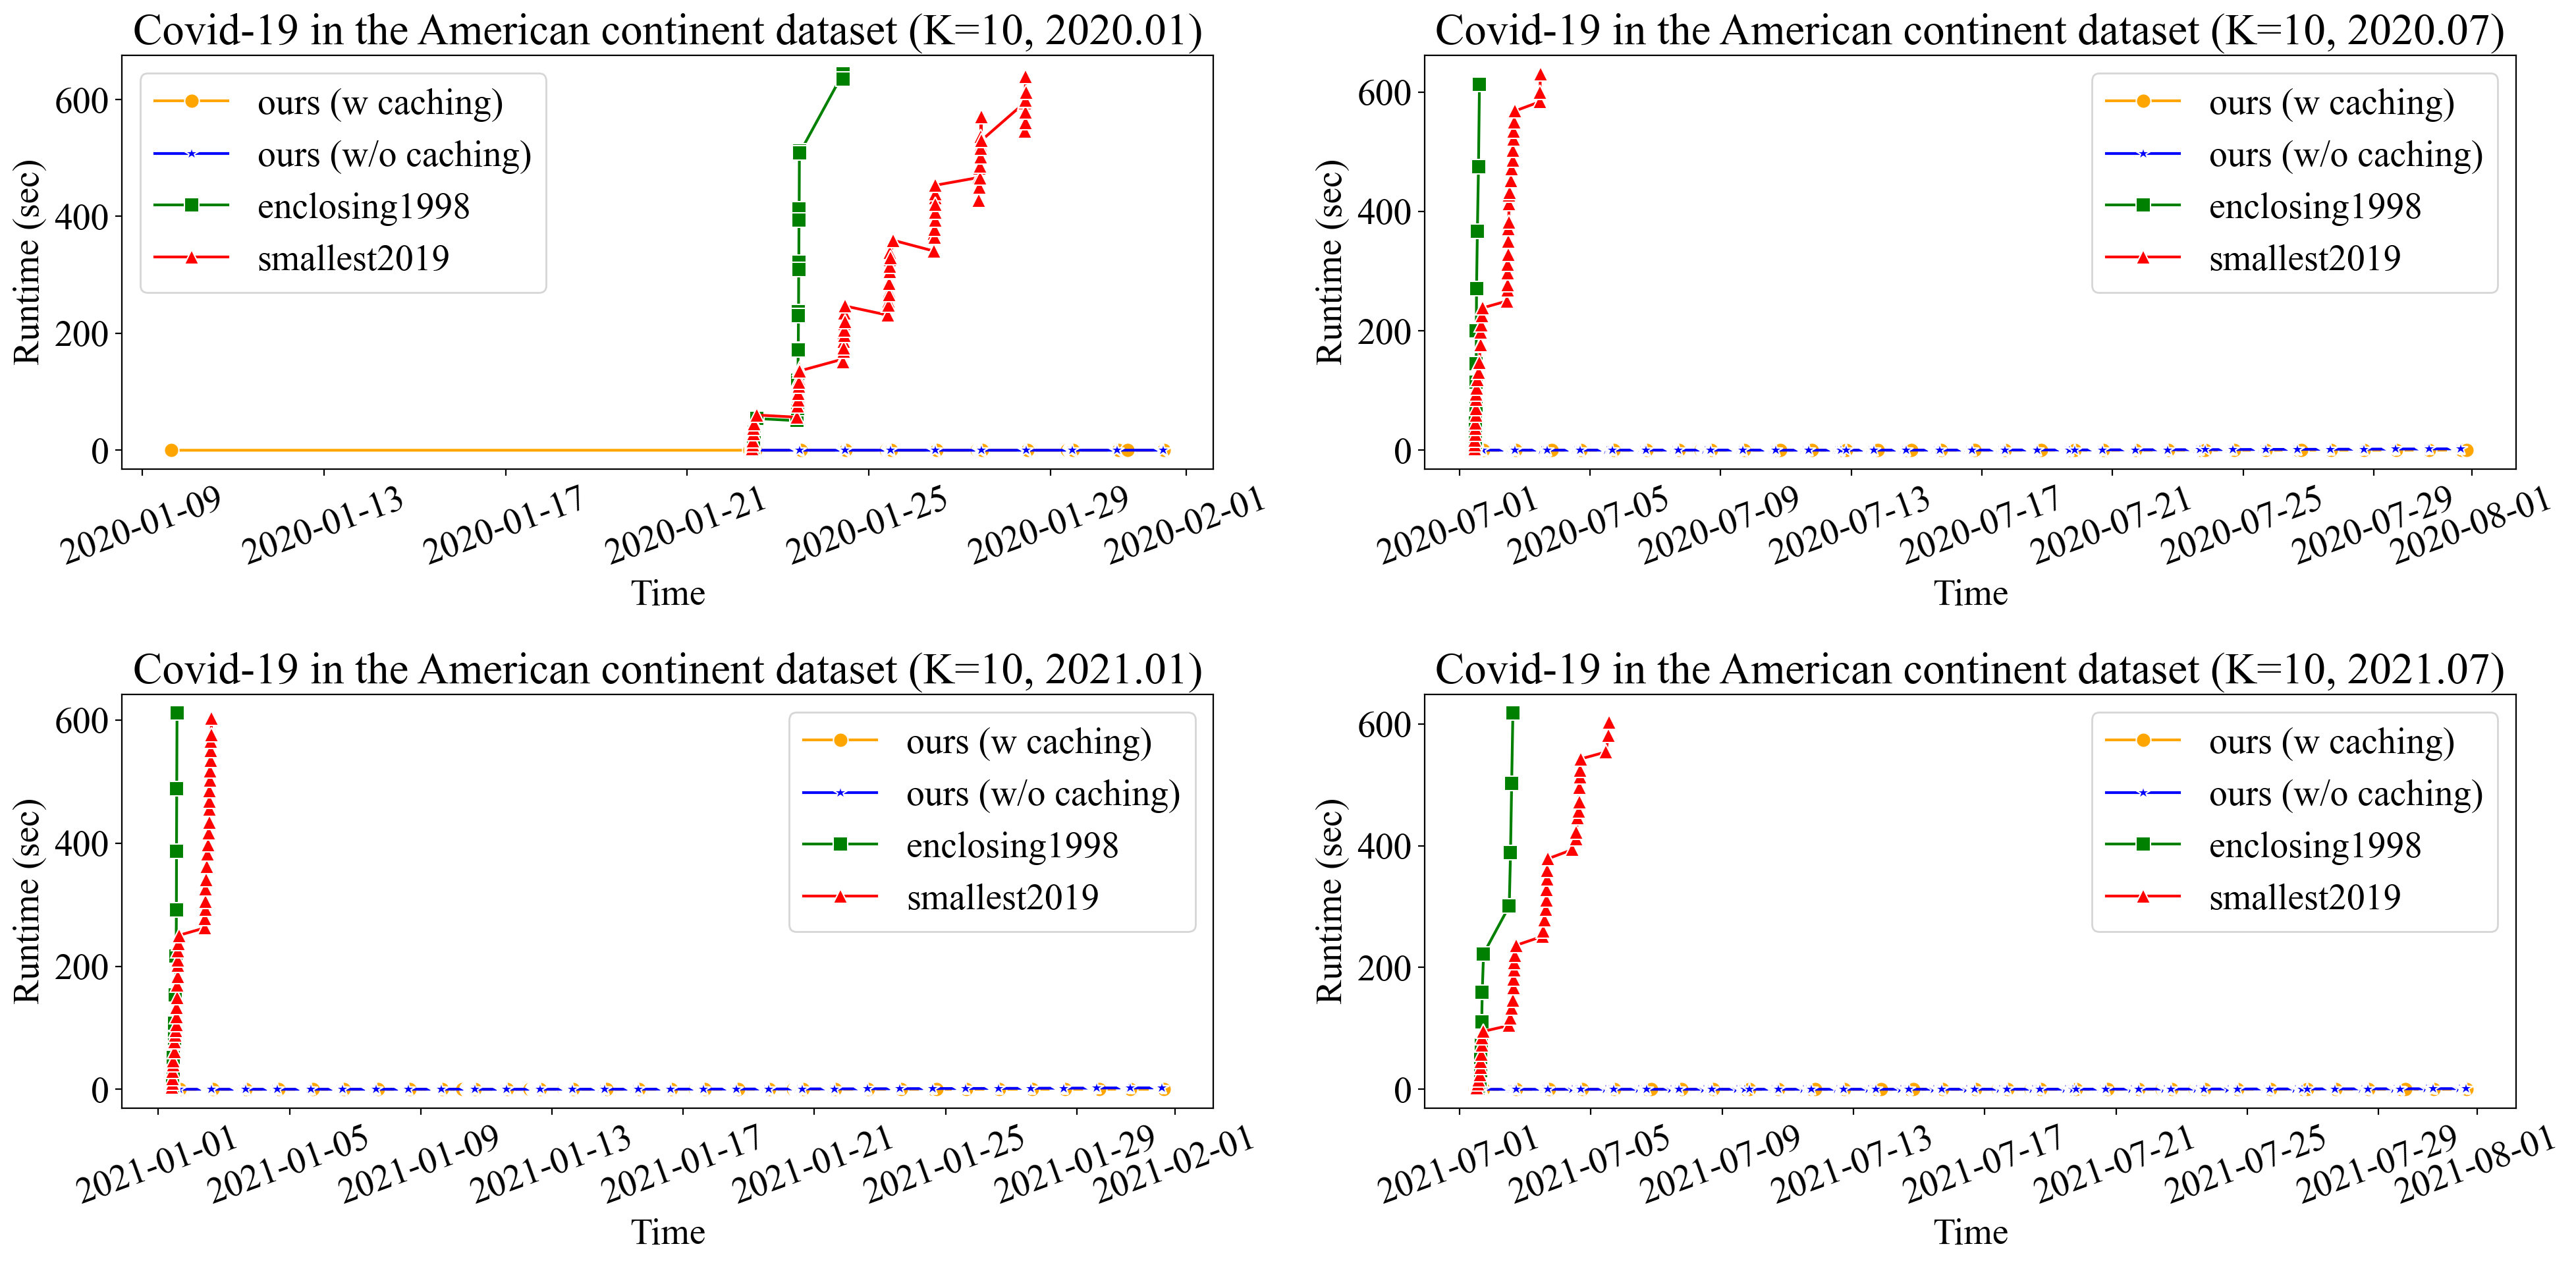

In [25]:
plt.rcParams.update({'font.size': 20, "font.family": "Times New Roman"})
plt.figure(figsize=(20, 10), dpi=200)

i = 0
for y in [2020, 2021]:
    for m in [1, 7]:
        plt.subplot(2, 2, i + 1)
        our_name_w_caching = f"../logs/ours/covid_american_streaming_k10_true_{y}-{m}.txt"
        our_name_wo_caching = f"../logs/ours/covid_american_streaming_k10_false_{y}-{m}.txt"
        name_enclosing1998 = f"../logs/related_works/enclosing1998/covid_american_streaming_k10_{y}-{m}.txt"
        name_smallest2019 = f"../logs/related_works/smallest2019/covid_american_streaming_k10_{y}-{m}.txt"

        sns.lineplot(data=runtimes[our_name_w_caching], x="time", y="runtime", estimator=np.mean, errorbar="sd", label=labels[our_name_w_caching], marker=markers[our_name_w_caching], ms=8, linestyle="-", color=colors[our_name_w_caching])
        sns.lineplot(data=runtimes[our_name_wo_caching], x="time", y="runtime", estimator=np.mean, errorbar="sd", label=labels[our_name_wo_caching], marker=markers[our_name_wo_caching], ms=8, linestyle="-", color=colors[our_name_wo_caching])
        sns.lineplot(data=runtimes[name_enclosing1998], x="time", y="runtime", label=labels[name_enclosing1998], marker=markers[name_enclosing1998], ms=8, linestyle="-", color=colors[name_enclosing1998])
        sns.lineplot(data=runtimes[name_smallest2019], x="time", y="runtime", label=labels[name_smallest2019], marker=markers[name_smallest2019], ms=8, linestyle="-", color=colors[name_smallest2019])

        plt.legend()
        plt.xlabel("Time")

        # plt.xticks(np.arange(len(xticks)), xticks_str)
        plt.xticks(None, None, rotation=20)
        plt.ylabel("Runtime (sec)")
        plt.title(f"Covid-19 in the American continent dataset (K=10, {y}.{m:02d})")
        i += 1

plt.tight_layout()
plt.savefig("runtime_comparison_covid_time_axis2.png")
plt.show()